<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

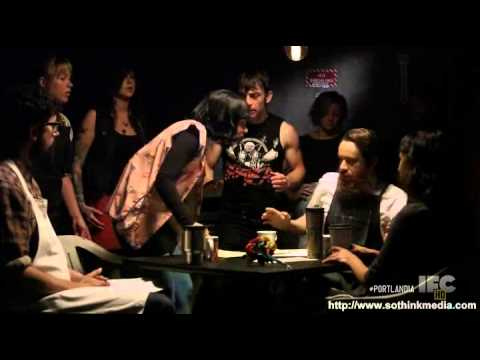

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\hkang\\repos\\unit-4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd
import spacy
import squarify
import matplotlib.pyplot as plt

In [4]:

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# Start here 
shops['star_rating'] = shops['star_rating'].str.slice(0,2)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [6]:
shops

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4
...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3


In [7]:
"""
sent = "This is the start of our NLP adventures. We started here with Spacy. We are starting here with NLP."

nlp = spacy.load("en_core_web_lg")

doc = nlp(sent)

# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)
"""

'\nsent = "This is the start of our NLP adventures. We started here with Spacy. We are starting here with NLP."\n\nnlp = spacy.load("en_core_web_lg")\n\ndoc = nlp(sent)\n\n# Lemma Attributes\nfor token in doc:\n    print(token.text, "  ", token.lemma_)\n'

In [8]:
# Wrap it all in a function

print("done 1")

nlp = spacy.load("en_core_web_lg")

def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

print("done 2")

done 1
done 2


In [9]:
shops['review_lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [10]:
shops

,coffee_shop_name,full_review_text,star_rating,review_lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,"[ , 11/25/2016, 1, check, Love, love, love, at..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,"[ , 12/2/2016, list, Date, Night, Austin, Ambi..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,"[ , 11/30/2016, 1, check, list, Brunch, Spots,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,"[ , 11/25/2016, cool, decor, good, drink, nice..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,"[ , 12/3/2016, 1, check, locate, Northcross, m..."
...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4,"[ , 2/19/2015, actually, step, restaurant, cha..."
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5,"[ , 1/21/2016, ok, Steeping, Room, awesome, gr..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4,"[ , 4/30/2015, love, come, tea, atmosphere, pr..."
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3,"[ , 8/2/2015, food, average, booth, feel, clea..."


In [11]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['review_lemmas'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[(' ', 22606),
 ('coffee', 10107),
 ('place', 6026),
 ('good', 5341),
 ('great', 3911),
 ('check', 3468),
 ('like', 3379),
 ('come', 2638),
 ('time', 2384),
 ('drink', 2343)]

In [20]:
word_counts

Counter({' ': 22606,
         '11/25/2016': 20,
         '1': 2251,
         'check': 3468,
         'Love': 86,
         'love': 2298,
         'atmosphere': 936,
         'corner': 176,
         'coffee': 10107,
         'shop': 2183,
         'style': 123,
         'swing': 121,
         'order': 2129,
         'matcha': 137,
         'latte': 1711,
         'muy': 4,
         'fantastico': 5,
         'get': 1904,
         'drink': 2343,
         'pretty': 1365,
         'streamlined': 5,
         'iPad': 51,
         'include': 186,
         'beverage': 188,
         'selection': 706,
         'range': 61,
         'wine': 255,
         'desire': 46,
         'level': 92,
         'sweetness': 117,
         'checkout': 6,
         'system': 65,
         'minute': 423,
         'hope': 196,
         'typical': 109,
         'heart': 126,
         'feather': 5,
         'find': 1160,
         'list': 704,
         'possibility': 7,
         'art': 264,
         'idea': 156,
        

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [13]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

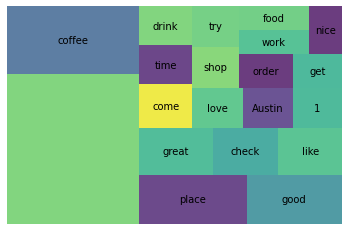

In [14]:
wc = count(shops['review_lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

